# Lending Club Data analysis

Plan:
* EDA - Exploratory Data Analysis - look at distribution of variables, min, max values, missing values, correlations etc
* train-val-test split
* fit machine learning models, tune hyperparameters
* evaluate - choose appropriate metrics

## 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("loan.csv")

/Users/testuser/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


Let's start by removing columns with majority of observations missing.

In [5]:
raw_data.isnull().sum()/raw_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.057993
emp_length                     0.050514
home_ownership                 0.000000
annual_inc                     0.000005
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.857977
purpose                        0.000000
title                          0.000171
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Let's remove all columns with more than 60% missing values.

In [6]:
len(raw_data.columns)

74

In [7]:
for col in raw_data.columns:
    percentage_missing = raw_data[col].isnull().sum()/raw_data.shape[0]
    if percentage_missing > 0.6:
        raw_data.drop(columns=[col], axis=1, inplace=True)

In [8]:
len(raw_data.columns)

54

Let's go throuh each remaining variable and analyze it.

In [9]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


###### ID

ID has no predictive power, so let's drop it.

In [10]:
raw_data.drop(columns=['id'], axis=1, inplace=True)

##### member_id

In [11]:
len(raw_data['member_id'].unique())

887379

In [12]:
raw_data.shape

(887379, 53)

There's the same number of unique member_id's as rows in the entire table, so it has no predictive power. Let's drop this too.

In [13]:
raw_data.drop(columns=['member_id'], axis=1, inplace=True)

##### loan_amnt

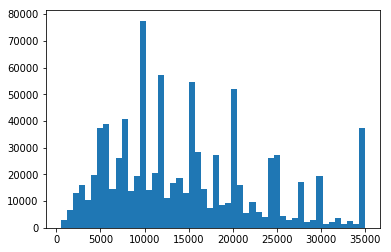

In [14]:
plt.hist(raw_data['loan_amnt'], bins=50)
plt.show()

We can see people usually apply for 'round' values, liek 5000, 10000 etc. Perhaps we can transform this continous variable to a categorical one by binning amounts to intervals 0-2500, 2500-7500 etc. For now though, let's apply log transformation.

In [15]:
raw_data['loan_amnt'] = np.log1p(raw_data['loan_amnt'])

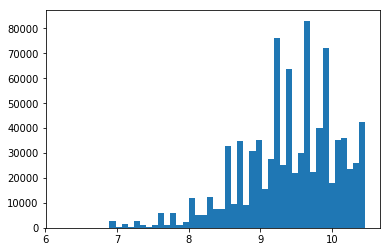

In [16]:
plt.hist(raw_data['loan_amnt'], bins=50)
plt.show()

In [17]:
raw_data['loan_amnt'].isnull().sum()

0

No missing values to handle.

#### funded_amnt

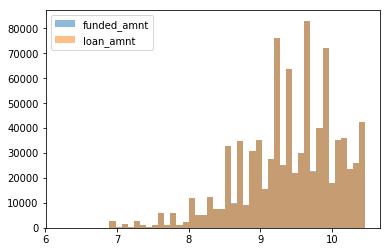

In [18]:
plt.hist(np.log1p(raw_data['funded_amnt']), bins=50, alpha=0.5, label='funded_amnt')
plt.hist(raw_data['loan_amnt'], bins=50, alpha=0.5, label='loan_amnt')
plt.legend()
plt.show()

These values are nearly identical, thus there are highly correlated. Most likely we will ditch one of them.

In [19]:
raw_data['funded_amnt'].isnull().sum()

0

In [20]:
(raw_data['funded_amnt'] > raw_data['loan_amnt']).sum()

887379

In [21]:
(raw_data['funded_amnt'] < raw_data['loan_amnt']).sum()

0

In [22]:
((raw_data['funded_amnt'] < raw_data['loan_amnt']).sum()/raw_data.shape[0])*100

0.0

Only 0.2% of lenders got less money then they asked for, thus we can remove funded_amnt from the data set.

In [23]:
raw_data.drop(columns=['funded_amnt'], axis=1, inplace=True)

#### funded_amnt_inv

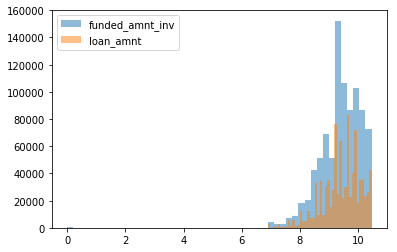

In [24]:
plt.hist(np.log1p(raw_data['funded_amnt_inv']), bins=50, alpha=0.5, label='funded_amnt_inv')
plt.hist(raw_data['loan_amnt'], bins=50, alpha=0.5, label='loan_amnt')
plt.legend()
plt.show()

In [25]:
from scipy.stats import pearsonr

In [26]:
pearsonr(raw_data['funded_amnt_inv'], raw_data['loan_amnt'])

(0.9248548865316268, 0.0)

In [27]:
raw_data.drop(columns=['funded_amnt_inv'], axis=1, inplace=True)

#### int_rate

In [28]:
raw_data['int_rate'].describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

In [29]:
raw_data['int_rate'].isnull().sum()

0

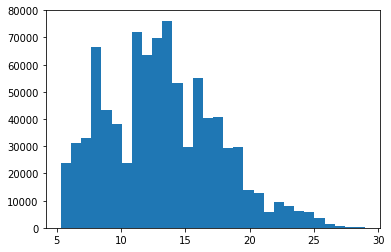

In [30]:
plt.hist(raw_data['int_rate'], bins=30)
plt.show()

The data is slightly skewd, thus we perform log transformation in order to make its distribution more normal and decrease the range of values.

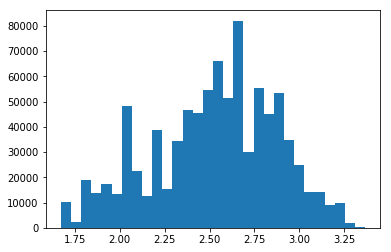

In [31]:
plt.hist(np.log(raw_data['int_rate']), bins=30)
plt.show()

In [32]:
raw_data['int_rate'] = np.log(raw_data['int_rate'])

#### installment

In [33]:
raw_data['installment'].isnull().sum()

0

In [34]:
raw_data['installment'].describe()

count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment, dtype: float64

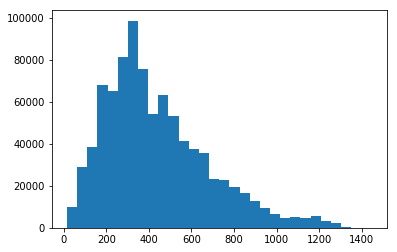

In [35]:
plt.hist(raw_data['installment'], bins=30)
plt.show()

Same as with the previous variable, data is skewed. Let's log normalize it.

In [36]:
raw_data['installment'] = np.log(raw_data['installment'])

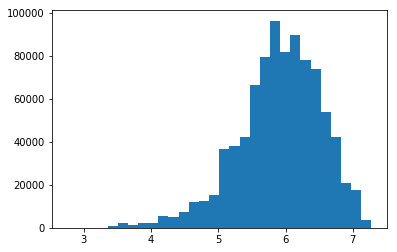

In [37]:
plt.hist(raw_data['installment'], bins=30)
plt.show()

#### annual_inc

In [38]:
raw_data['annual_inc'].isnull().sum()

4

There are four null values. Such applications should be rejected on formal basis, thus we can remove these observations from our dataset.

In [39]:
raw_data.dropna(subset=['annual_inc'], axis=0, inplace=True)

In [40]:
raw_data['annual_inc'].isnull().sum()

0

In [41]:
raw_data['annual_inc'].describe()

count    8.873750e+05
mean     7.502759e+04
std      6.469830e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

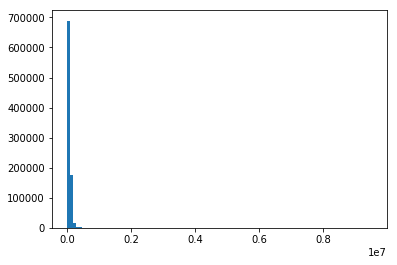

In [42]:
plt.hist(raw_data['annual_inc'], bins=100)
plt.show()

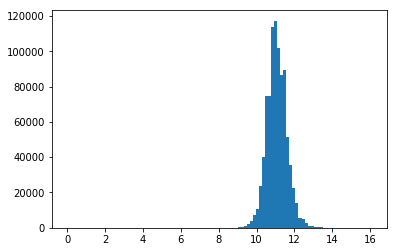

In [43]:
plt.hist(np.log1p(raw_data['annual_inc']), bins=100)
plt.show()

In [44]:
raw_data['annual_inc'] = np.log1p(raw_data['annual_inc'])

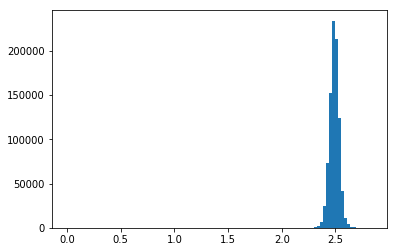

In [45]:
plt.hist(np.log1p(raw_data['annual_inc']), bins=100)
plt.show()

#### grade

In [46]:
raw_data['grade'].describe()

count     887375
unique         7
top            B
freq      254535
Name: grade, dtype: object

In [47]:
raw_data['grade'].value_counts()

B    254535
C    245860
A    148198
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [48]:
raw_data['grade'].isnull().sum()

0

Since there is a natural order to grade's, instead of traditional one-hot encoding we can use ordinal encoding, thus avoiding expanding the number of variables beyond what's strictly necessary.

In [49]:
def grade_to_int_mapping(grade):
    d = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    return d[grade]

In [50]:
raw_data['grade'] = raw_data['grade'].apply(grade_to_int_mapping)

#### sub_grade

In [51]:
raw_data['sub_grade'].describe()

count     887375
unique        35
top           B3
freq       56323
Name: sub_grade, dtype: object

In [52]:
raw_data['sub_grade'].value_counts()

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44815
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23455
A1    22913
A2    22484
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64

It appears that once we have subgrades, actual grade are not needed anymore. Let's check if subgrade of format XY always corresponds to grade X.

In [53]:
(raw_data['sub_grade'].apply(lambda x: grade_to_int_mapping(x[0])) != raw_data['grade']).sum()

0

This is indeed correct. Thus we can remove grade altogether.

In [54]:
raw_data.drop(columns=['grade'], axis=1, inplace=True)

As already noted, there is a natural order to the grades, thus ordinal encoding is most appropriate. Let's encode the variables using the following schema: 

A ->1, thus A1 -> 1.1, A2 -> 1.2 etc, B ->2, thus B1 -> 2.1 etc. 

Hence, the lower the number the better the grade.

In [55]:
def subgrade_to_ordinal_encoding(subgrade):
    d = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    return d[subgrade[0]] + float('0.' + (subgrade[1]))

In [56]:
raw_data['sub_grade'] = raw_data['sub_grade'].apply(subgrade_to_ordinal_encoding)

#### emp_title

In [57]:
raw_data['emp_title'].describe()

count      835917
unique     299271
top       Teacher
freq        13469
Name: emp_title, dtype: object

In [58]:
raw_data['emp_title'].isnull().sum()

51458

In [59]:
raw_data['emp_title'].isnull().sum()/raw_data.shape[0]*100

5.798901253697704

We can assume that people who did not fill their work title are unemployed.

In [60]:
raw_data['emp_title'] = raw_data['emp_title'].fillna('unemployed')

In [61]:
raw_data['emp_title'].value_counts()

unemployed                               51458
Teacher                                  13469
Manager                                  11240
Registered Nurse                          5525
Owner                                     5376
RN                                        5355
Supervisor                                4983
Sales                                     4212
Project Manager                           3988
Driver                                    3569
Office Manager                            3510
General Manager                           3178
Director                                  3156
manager                                   3138
teacher                                   2925
owner                                     2849
Engineer                                  2671
President                                 2598
driver                                    2429
Vice President                            2351
Attorney                                  2136
Operations Ma

Let's leave it for now - an extended analysis of possible profession with the aim of categorizing them into around 10 possible buckets is necessary.

#### emp_length

In [62]:
raw_data['emp_length'].describe()

count        842550
unique           11
top       10+ years
freq         291569
Name: emp_length, dtype: object

In [63]:
raw_data['emp_length'].isnull().sum()

44825

We assume that empty values mean no work, thus we fill them with 0s.

In [64]:
raw_data['emp_length'] = raw_data['emp_length'].fillna(0)

In [65]:
(raw_data['emp_length'] == 0).sum()

44825

In [66]:
((raw_data['emp_length'][raw_data['emp_title'] == 'unemployed']) == 0).sum()

44436

We see that indeed people who did not submit their job titles did not submit their employment lenght's either, thus reinforcing out assumption that these people are unemployed.

Having used emp_title, let's drop it.

In [67]:
raw_data.drop(columns=['emp_title'], axis=1, inplace=True)

In [68]:
raw_data['emp_length'].value_counts()

10+ years    291569
2 years       78870
< 1 year      70601
3 years       70026
1 year        57095
5 years       55704
4 years       52529
0             44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [69]:
def parse_emp_length(emp_length):
    try:
        emp_length_list = emp_length.split()
        val = int(emp_length_list[0].strip('+'))
    except ValueError:
        val = 0.5
    except AttributeError:
        val = 0
    
    return val 

# better ask forigvness than permission

In [70]:
raw_data['emp_length'] = raw_data['emp_length'].apply(parse_emp_length)

#### home_ownership

In [71]:
raw_data['home_ownership'].describe()

count       887375
unique           6
top       MORTGAGE
freq        443557
Name: home_ownership, dtype: object

In [72]:
raw_data['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            46
ANY              3
Name: home_ownership, dtype: int64

This is a classic variable that needs one-hot encoding. However, there are very few observations falling into NONE or ANY categories, thus we will incorporate those into OTHER category. Also notice that provide .xlsx file does not mention NONE or ANY categories.

In [73]:
raw_data['home_ownership'] = raw_data['home_ownership'].apply(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)

In [74]:
raw_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [75]:
raw_data = pd.get_dummies(raw_data, columns=['home_ownership'])

In [76]:
raw_data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,...,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,8.517393,36 months,2.365560,5.092952,2.2,10.0,10.085851,Verified,Dec-2011,Fully Paid,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,1
1,7.824446,60 months,2.725890,4.091507,3.4,0.5,10.308986,Source Verified,Dec-2011,Charged Off,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,1
2,7.783641,36 months,2.770086,4.434738,3.5,10.0,9.413526,Not Verified,Dec-2011,Fully Paid,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,1
3,9.210440,36 months,2.601949,5.826914,3.1,10.0,10.803669,Source Verified,Dec-2011,Fully Paid,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,1
4,8.006701,60 months,2.540814,4.216415,2.5,1.0,11.289794,Source Verified,Dec-2011,Current,...,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,1


#### term

In [77]:
raw_data['term'].describe()

count         887375
unique             2
top        36 months
freq          621121
Name: term, dtype: object

In [78]:
raw_data['term'].isnull().sum()

0

Term is a binary variable. Let's encode it as follows: 36 months -> 0, 60 months -> 1.

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
raw_data['term'] = LabelEncoder().fit_transform(raw_data['term'])

In [81]:
raw_data['term'].value_counts()

0    621121
1    266254
Name: term, dtype: int64

#### verification_status

In [82]:
raw_data['verification_status'].describe()

count              887375
unique                  3
top       Source Verified
freq               329558
Name: verification_status, dtype: object

In [83]:
raw_data['verification_status'].isnull().sum()

0

In [84]:
raw_data['verification_status'].value_counts()

Source Verified    329558
Verified           291071
Not Verified       266746
Name: verification_status, dtype: int64

In [85]:
raw_data = pd.get_dummies(raw_data, columns=['verification_status'])

#### issue_d

In [86]:
raw_data['issue_d'].describe()

count       887375
unique         103
top       Oct-2015
freq         48631
Name: issue_d, dtype: object

In [87]:
raw_data['issue_d'].isnull().sum()

0

In [88]:
raw_data['issue_d'].value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44342
Oct-2014    38782
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Jul-2014    29306
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Dec-2013    15020
Nov-2013    14676
Oct-2013    14114
Sep-2013    12987
Aug-2013    12674
Jul-2013    11910
Jun-2013    10899
Sep-2014    10606
            ...  
Dec-2009      658
Oct-2009      604
Sep-2009      507
Aug-2009      446
Jul-2009      411
Jun-2009      406
Mar-2008      402
May-2009      359
Apr-2009      333
Mar-2009      324
Feb-2008      306
Jan-2008      305
Feb-2009      302
Jan-2009      269
Apr-2008      259
Dec-2008      253
Nov-2008      209
Dec-2007      172
Jul-2008      141
Jun-2008      124
Oct-2008      122
May-2008      115
Nov-2007      112
Oct-2007      105
Aug-2008  

In [89]:
from time import strptime

# example usage
strptime('Feb','%b').tm_mon

2

Let's create a new column with month of issue encoded as an int.

In [90]:
raw_data['issue_month'] = raw_data['issue_d'].apply(lambda x: strptime(x[:3], '%b').tm_mon)

In [91]:
raw_data['issue_year'] = raw_data['issue_d'].apply(lambda x: int(x[4:]))

In [92]:
raw_data['issue_year'] = (raw_data['issue_year'] - 2000)

In [93]:
raw_data.drop(columns=['issue_d'], axis=1, inplace=True)

#### pymnt_plan

In [94]:
raw_data['pymnt_plan'].describe()

count     887375
unique         2
top            n
freq      887365
Name: pymnt_plan, dtype: object

In [95]:
raw_data['pymnt_plan'].isnull().sum()

0

In [96]:
raw_data['pymnt_plan'].value_counts()

n    887365
y        10
Name: pymnt_plan, dtype: int64

This column is virtually constant as there are only 10 people with a payment plan. Let's drop it.

In [97]:
raw_data.drop(columns=['pymnt_plan'], axis=1, inplace=True)

#### url

This is equivalent to ID of the loan.

In [98]:
raw_data.drop(columns=['url'], axis=1, inplace=True)

#### purpose

In [99]:
raw_data['purpose'].describe()

count                 887375
unique                    14
top       debt_consolidation
freq                  524215
Name: purpose, dtype: object

In [100]:
raw_data['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42890
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [101]:
raw_data = pd.get_dummies(raw_data, columns=['purpose'])

#### title

In [102]:
raw_data['title'].describe()

count                 887223
unique                 63143
top       Debt consolidation
freq                  414001
Name: title, dtype: object

In [103]:
raw_data['purpose_debt_consolidation'][raw_data['title'] == 'Debt consolidation'].sum()

413228

In [104]:
(raw_data['title'] == 'Debt consolidation').sum()

414001

We see that there is very high overlap between debt consolidation being the title and the purpose of the loan. Also, there is a very high number of purpose categories. We will thus remove that column from the dataset.

In [105]:
raw_data['title']

0                                      Computer
1                                          bike
2                          real estate business
3                                      personel
4                                      Personal
5         My wedding loan I promise to pay back
6                                          Loan
7                               Car Downpayment
8          Expand Business & Buy Debt Portfolio
9                   Building my credit history.
10                   High intrest Consolidation
11                                Consolidation
12                                      freedom
13                                citicard fund
14                                   Other Loan
15                      Debt Consolidation Loan
16                                         Home
17                                      Holiday
18                                      Medical
19          lowerratemeanseasiertogetoutofdebt!
20                    Freedom From Credi

In [106]:
raw_data.drop(columns=['title'], axis=1, inplace=True)

#### zip code

In [107]:
raw_data['zip_code'].describe()

count     887375
unique       935
top        945xx
freq        9770
Name: zip_code, dtype: object

In [108]:
raw_data['zip_code'].isnull().sum()

0

There's too many unique zip codes to one-hot-encode them. However, there is a column encoding the state. We thus remove zipcode column and keep the state only.

In [109]:
raw_data.drop(columns=['zip_code'], inplace=True, axis=1)

#### state

In [110]:
raw_data['addr_state'].describe()

count     887375
unique        51
top           CA
freq      129517
Name: addr_state, dtype: object

In [111]:
raw_data['addr_state'].isnull().sum()

0

In [112]:
raw_data['addr_state'].value_counts()

CA    129517
NY     74082
TX     71138
FL     60935
IL     35476
NJ     33256
PA     31393
OH     29631
GA     29085
VA     26255
NC     24720
MI     22985
MD     21031
MA     20593
AZ     20412
WA     19434
CO     18807
MN     15957
MO     14207
IN     13789
CT     13531
TN     12887
NV     12443
WI     11574
AL     11200
OR     10893
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6264
NM      4939
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

There are too many states to one-hot-encode them and some of them are very rare. Let's put each which accounts for less than ~1% of all records to 'Other' category.

In [113]:
0.01*raw_data.shape[0]

8873.75

So let's group together all the states with less than 10000 observations.

In [114]:
state_counts = raw_data['addr_state'].value_counts()

In [115]:
raw_data['addr_state'] = raw_data['addr_state'].apply(
    lambda x: x if state_counts[x] > 10000 else 'Other')

Let's look at value counts of remaining states and other.

In [116]:
raw_data['addr_state'].value_counts()

CA       129517
Other     80918
NY        74082
TX        71138
FL        60935
IL        35476
NJ        33256
PA        31393
OH        29631
GA        29085
VA        26255
NC        24720
MI        22985
MD        21031
MA        20593
AZ        20412
WA        19434
CO        18807
MN        15957
MO        14207
IN        13789
CT        13531
TN        12887
NV        12443
WI        11574
AL        11200
OR        10893
SC        10639
LA        10587
Name: addr_state, dtype: int64

In [117]:
len(raw_data['addr_state'].value_counts())

29

In [118]:
raw_data = pd.get_dummies(raw_data, columns=['addr_state'])

#### dti

In [119]:
raw_data['dti'].describe()

count    887375.000000
mean         18.157113
std          17.190629
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

In [120]:
raw_data['dti'].isnull().sum()

0

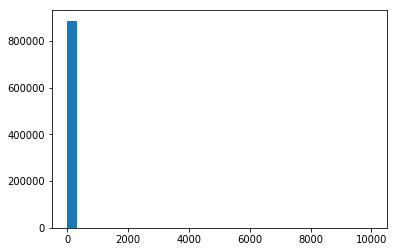

In [121]:
plt.hist(raw_data['dti'], bins=30)
plt.show()

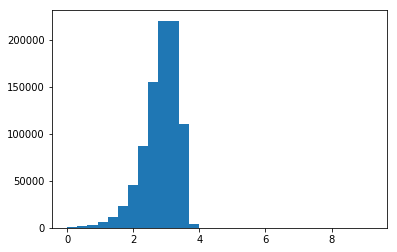

In [122]:
plt.hist(np.log1p(raw_data['dti']), bins=30)
plt.show()

In [123]:
(raw_data['dti'] > 100).sum()

11

In [124]:
max(raw_data['dti'])

9999.0

There are some very high numbers which can either indicate an error in measurment or reported income close to 0 (which would mean DTI -> infinity). However, if we simply log the data, we achive two goals: make the range of values closer to ranges of values of other variables (which is important in fitting linear models), and reduce the effect of outlier values.

In [125]:
raw_data['dti'] = np.log1p(raw_data['dti'])

#### delinq_2yrs

In [126]:
raw_data['delinq_2yrs'].describe()

count    887350.000000
mean          0.314442
std           0.862244
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

Since there are only 25 observations with missing value, we can safely drop them.

In [127]:
raw_data.dropna(subset=['delinq_2yrs'], axis=0, inplace=True)

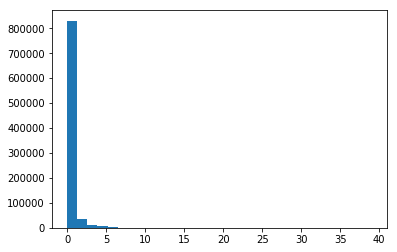

In [128]:
plt.hist(raw_data['delinq_2yrs'], bins=30)
plt.show()

In [129]:
(raw_data['delinq_2yrs'] > 1).sum()/raw_data.shape[0]

0.064422155857328

In [130]:
(raw_data['delinq_2yrs'] == 1).sum()/raw_data.shape[0]

0.1275979038710768

There's only 6 percent of people who were late more thanc once in last two years. x% of people were late exactly once, and everyone else was never late. Thus we create three categories: 0-never late, 1-late once, 2-late twice or more.

In [131]:
def delinq_2yrs_categorizer(delinq):
    if delinq == 0:
        return 0
    if delinq == 1:
        return 1
    else:
        return 2

In [132]:
raw_data['delinq_2yrs'] = raw_data['delinq_2yrs'].apply(delinq_2yrs_categorizer)

#### earliest_cr_line

In [133]:
raw_data['earliest_cr_line'].describe()

count       887350
unique         697
top       Aug-2001
freq          6659
Name: earliest_cr_line, dtype: object

In [134]:
raw_data['earliest_cr_line'].isnull().sum()

0

In [135]:
def get_year(date):
    try:
        return date[4:]
    except TypeError:
        return 'NA'

In [136]:
len(raw_data['earliest_cr_line'].apply(get_year).unique())

67

In [137]:
earliest_cr_line_year_vc = raw_data['earliest_cr_line'].apply(get_year).value_counts()

In [138]:
earliest_cr_line_year_vc

2001    63116
2000    62614
2002    57410
1999    56747
2003    52730
1998    48381
2004    47246
1997    40933
1996    40461
2005    38641
1995    37827
1994    34493
2006    32374
1993    27958
2007    25430
1992    19941
1990    19630
1991    18588
1989    17833
2008    16229
1988    14931
1987    13244
1986    11244
1985     9953
2009     9548
1984     9238
2010     8167
1983     7568
2011     6324
1982     5709
        ...  
1975     1747
1974     1534
1973     1374
1972     1212
1971      793
1970      775
1969      687
1968      501
1967      477
1966      328
1965      281
1964      192
1963      154
1962       89
1960       67
1961       60
1959       48
1958       28
1956       16
1957       15
1955       14
1950        8
1951        6
1953        5
1954        5
1952        3
1944        2
1946        2
1948        1
1949        1
Name: earliest_cr_line, Length: 67, dtype: int64

Again, there are two many categories to one hot encode them but we can group all years with fewer than 10000 observations to category 'Other'.

First though, let's get a column with earliest_cr_line year only. We decided not to include the month as a variable in the model, as it shouldn't carry much predictive power.

In [139]:
raw_data['earliest_cr_line_year'] = raw_data['earliest_cr_line'].apply(get_year)

In [140]:
raw_data['earliest_cr_line_year'] = raw_data['earliest_cr_line_year'].apply(
    lambda x: x if earliest_cr_line_year_vc[x] > 10000 else 'Other')

In [141]:
raw_data.drop(columns=['earliest_cr_line'], axis=1, inplace=True)

In [142]:
raw_data['earliest_cr_line_year'].value_counts()

Other    89349
2001     63116
2000     62614
2002     57410
1999     56747
2003     52730
1998     48381
2004     47246
1997     40933
1996     40461
2005     38641
1995     37827
1994     34493
2006     32374
1993     27958
2007     25430
1992     19941
1990     19630
1991     18588
1989     17833
2008     16229
1988     14931
1987     13244
1986     11244
Name: earliest_cr_line_year, dtype: int64

In [143]:
raw_data = pd.get_dummies(raw_data, columns=['earliest_cr_line_year'])

#### inq_last_6_months

In [144]:
raw_data['inq_last_6mths'].describe()

count    887350.000000
mean          0.694623
std           0.998448
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

In [145]:
raw_data['inq_last_6mths'].isnull().sum()

0

Vast majority of values are 0, so fill missing values with 0.

In [146]:
raw_data['inq_last_6mths'] = raw_data['inq_last_6mths'].fillna(0)

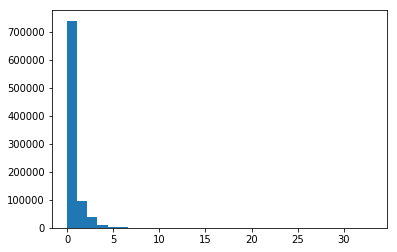

In [147]:
plt.hist(raw_data['inq_last_6mths'], bins=30)
plt.show()

In [148]:
(raw_data['inq_last_6mths'] > 10).sum()

71

Let's log normalize it to lessen the impact of few high values observations.

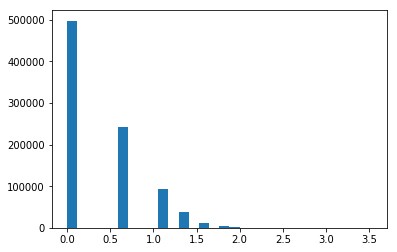

In [149]:
plt.hist(np.log1p(raw_data['inq_last_6mths']), bins=30)
plt.show()

In [150]:
raw_data['inq_last_6mths'] = np.log1p(raw_data['inq_last_6mths'])

#### mths_since_last_delinq

In [151]:
raw_data['mths_since_last_delinq']

0          NaN
1          NaN
2          NaN
3         35.0
4         38.0
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16        61.0
17         NaN
18         8.0
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27        20.0
28        18.0
29         NaN
          ... 
887349    69.0
887350    17.0
887351    38.0
887352     NaN
887353     NaN
887354     NaN
887355     NaN
887356     NaN
887357    30.0
887358     NaN
887359     NaN
887360    17.0
887361     NaN
887362    24.0
887363     8.0
887364    16.0
887365    10.0
887366     NaN
887367    29.0
887368     NaN
887369     NaN
887370    69.0
887371    65.0
887372     9.0
887373     NaN
887374     NaN
887375    26.0
887376     NaN
887377    22.0
887378     NaN
Name: mths_since_last_delinq, Length: 887350, dtype: float64

In [152]:
raw_data['mths_since_last_delinq'].isnull().sum()/raw_data.shape[0]

0.5119546965684341

Although there are a lot of missing vlaues, lack of a value most likely means deliquency never occured. All other values indicated that deliquency occured, also, its recency. We can fill NA values by putting really high values for NAs (pretending its infinity) and then log normalize.

In [153]:
max(raw_data['mths_since_last_delinq'][raw_data['mths_since_last_delinq'].notnull()])

188.0

Let's fill missing values with 10000.

In [154]:
raw_data['mths_since_last_delinq'] = raw_data['mths_since_last_delinq'].fillna(10000)

And now log-normalize.

In [155]:
raw_data['mths_since_last_delinq'] = np.log1p(raw_data['mths_since_last_delinq'])

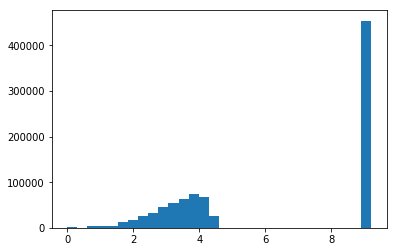

In [156]:
plt.hist(raw_data['mths_since_last_delinq'], bins=30)
plt.show()

#### open_acc

In [157]:
raw_data['open_acc'].describe()

count    887350.000000
mean         11.548469
std           5.317313
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [158]:
raw_data['open_acc'].isnull().sum()

0

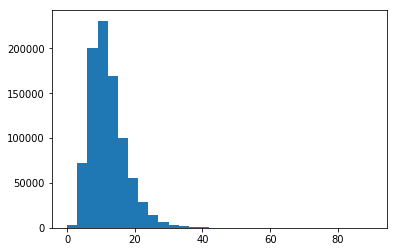

In [159]:
plt.hist(raw_data['open_acc'], bins=30)
plt.show()

log normalize to make the distribution more normal and make range of values smaller.

In [160]:
raw_data['open_acc'] = np.log1p(raw_data['open_acc'])

#### pub_rec

In [161]:
raw_data['pub_rec'].describe()

count    887350.000000
mean          0.195307
std           0.582091
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [162]:
raw_data['pub_rec'].isnull().sum()

0

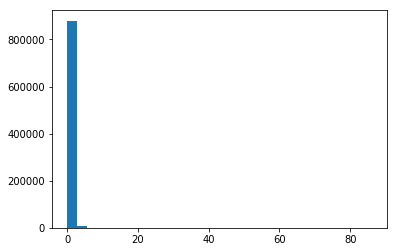

In [163]:
plt.hist(raw_data['pub_rec'], bins=30)
plt.show()

Again, there are some very high values. Let's log normalize to decrease their impact.

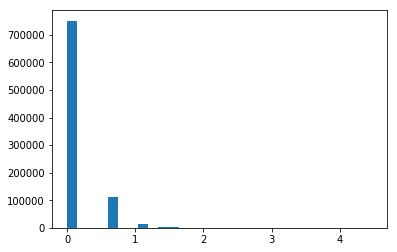

In [164]:
plt.hist(np.log1p(raw_data['pub_rec']), bins=30)
plt.show()

In [165]:
raw_data['pub_rec'] = np.log1p(raw_data['pub_rec'])

#### revol_bal

In [166]:
raw_data['revol_bal'].describe()

count    8.873500e+05
mean     1.692134e+04
std      2.242695e+04
min      0.000000e+00
25%      6.444000e+03
50%      1.187500e+04
75%      2.082900e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

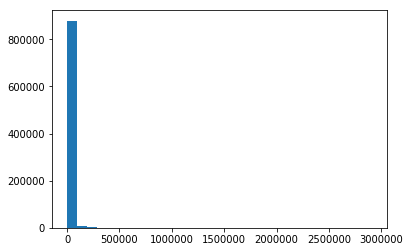

In [167]:
plt.hist(raw_data['revol_bal'], bins=30)
plt.show()

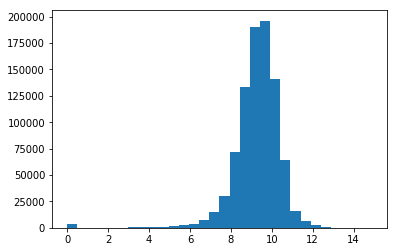

In [168]:
plt.hist(np.log1p(raw_data['revol_bal']), bins=30)
plt.show()

In [169]:
raw_data['revol_bal'] = np.log1p(raw_data['revol_bal'])

#### revol_util

In [170]:
raw_data['revol_util'].describe()

count    886877.000000
mean         55.067693
std          23.834344
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64

In [171]:
mean = raw_data['revol_util'].describe()['mean']

In [172]:
std = raw_data['revol_util'].describe()['std']

In [173]:
raw_data['revol_util'].isnull().sum()

473

Not many null values, let's remove them.

In [174]:
raw_data.dropna(subset=['revol_util'], axis=0, inplace=True)

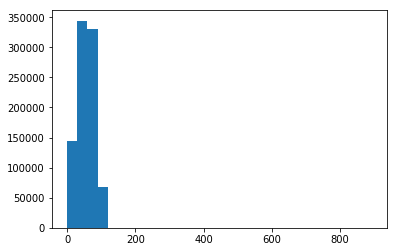

In [175]:
plt.hist(raw_data['revol_util'], bins=30)
plt.show()

To keep values of our variable near 0-1 range, let's standard scale this variable.

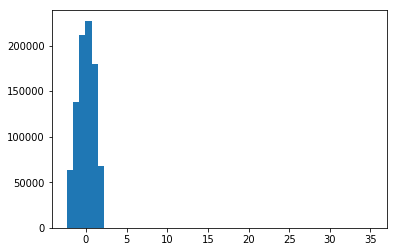

In [176]:
plt.hist(((raw_data['revol_util'] - mean) / std), bins=50)
plt.show()

In [177]:
raw_data['revol_util'] = (raw_data['revol_util'] - mean / std)

#### total_acc

In [178]:
raw_data['total_acc'].describe()

count    886877.000000
mean         25.270917
std          11.840087
min           1.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [179]:
mean = raw_data['total_acc'].describe()['mean']
std = raw_data['total_acc'].describe()['std']

In [180]:
raw_data['total_acc'].isnull().sum()

0

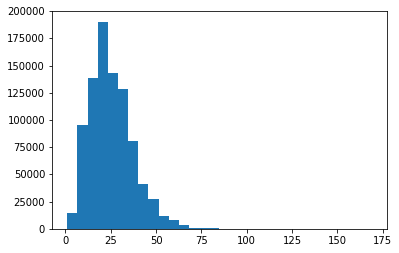

In [181]:
plt.hist(raw_data['total_acc'], bins=30)
plt.show()

As before, let's standard scale.

In [182]:
raw_data['total_acc'] = (raw_data['total_acc'] - mean) / std

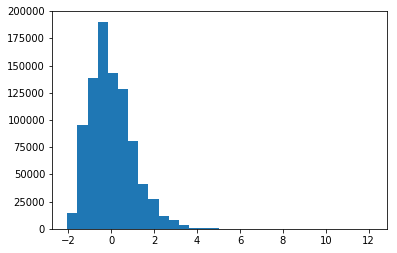

In [183]:
plt.hist(raw_data['total_acc'], bins=30)
plt.show()

#### out_prncp

In [184]:
raw_data['out_prncp'].describe()

count    886877.000000
mean       8404.708914
std        8493.343480
min           0.000000
25%           0.000000
50%        6464.280000
75%       13660.670000
max       49372.860000
Name: out_prncp, dtype: float64

In [185]:
raw_data['out_prncp'].isnull().sum()

0

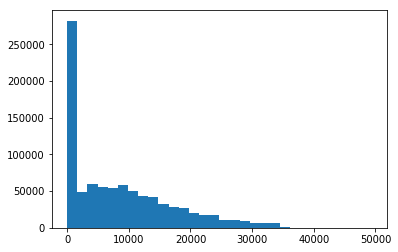

In [186]:
plt.hist(raw_data['out_prncp'], bins=30)
plt.show()

In [187]:
raw_data['out_prncp'] = np.log1p(raw_data['out_prncp'])

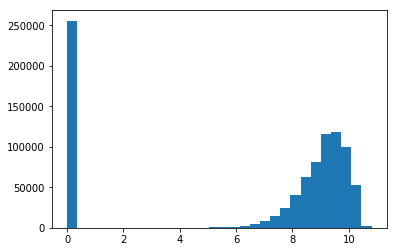

In [188]:
plt.hist(raw_data['out_prncp'], bins=30)
plt.show()

#### total_pymnt

In [189]:
raw_data['total_pymnt'].describe()

count    886877.000000
mean       7559.143190
std        7871.202065
min           0.000000
25%        1914.740000
50%        4895.330000
75%       10617.683402
max       57777.579870
Name: total_pymnt, dtype: float64

In [190]:
raw_data['total_pymnt'].isnull().sum()

0

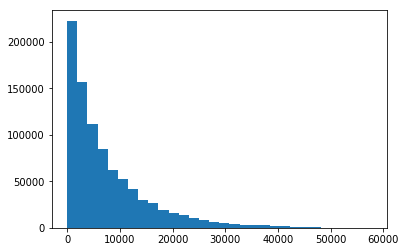

In [191]:
plt.hist(raw_data['total_pymnt'], bins=30)
plt.show()

In [192]:
raw_data['total_pymnt'] = np.log1p(raw_data['total_pymnt'])

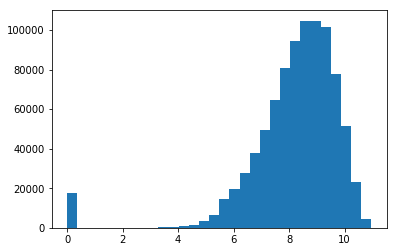

In [193]:
plt.hist(raw_data['total_pymnt'], bins=30)
plt.show()

#### tot_coll_amt

In [194]:
raw_data['tot_coll_amt'].describe()

count    8.167220e+05
mean     2.257490e+02
std      1.031374e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

In [195]:
raw_data['tot_coll_amt'].isnull().sum()

70155

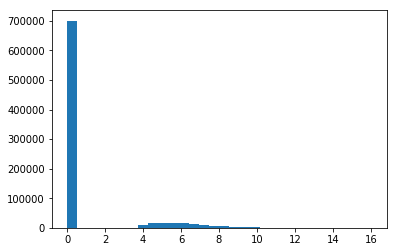

In [196]:
plt.hist(np.log1p(raw_data['tot_coll_amt'][raw_data['tot_coll_amt'].notnull()]), bins=30)
plt.show()

In [197]:
raw_data.drop(columns=['tot_coll_amt'], axis=1, inplace=True)

#### tot_cur_bal

In [198]:
raw_data['tot_cur_bal'].isnull().sum()

70155

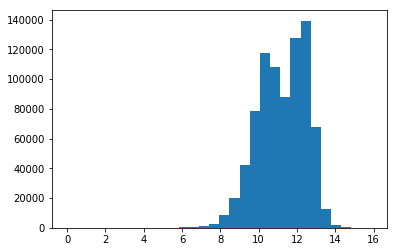

In [199]:
plt.hist(np.log1p(raw_data['tot_cur_bal'][raw_data['tot_cur_bal'].notnull()]), bins=30)
plt.show()

In [200]:
m = raw_data['tot_cur_bal'].mean()

In [201]:
m

139429.44805331557

In [202]:
raw_data['tot_cur_bal'] = raw_data['tot_cur_bal'].fillna(m)

In [203]:
raw_data['tot_cur_bal'] = np.log1p(raw_data['tot_cur_bal'])

#### total_rev_hi_lim 

In [204]:
raw_data['total_rev_hi_lim'].isnull().sum()

70155

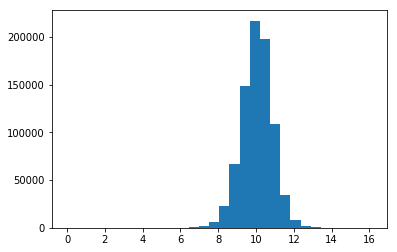

In [205]:
plt.hist(np.log1p(raw_data['total_rev_hi_lim'][raw_data['total_rev_hi_lim'].notnull()]), bins=30)
plt.show()

In [206]:
m = raw_data['total_rev_hi_lim'].mean()

In [207]:
raw_data['total_rev_hi_lim'] = raw_data['total_rev_hi_lim'].fillna(m)

In [208]:
raw_data['total_rev_hi_lim'] = np.log1p(raw_data['total_rev_hi_lim'])

#### total_pymnt_inv

In [209]:
raw_data['total_pymnt_inv'].describe()

count    886877.000000
mean       7521.656211
std        7846.004300
min           0.000000
25%        1900.520000
50%        4863.090000
75%       10567.230000
max       57777.580000
Name: total_pymnt_inv, dtype: float64

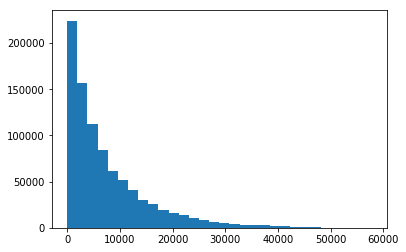

In [210]:
plt.hist(raw_data['total_pymnt_inv'], bins=30)
plt.show()

In [211]:
raw_data['total_pymnt_inv'] = np.log1p(raw_data['total_pymnt_inv'])

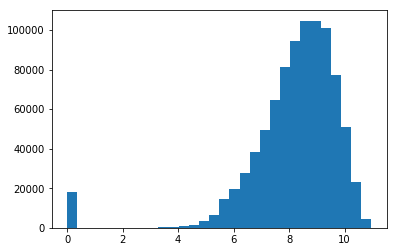

In [212]:
plt.hist(raw_data['total_pymnt_inv'], bins=30)
plt.show()

#### total_rec_prncp

In [213]:
raw_data['total_rec_prncp'].describe()

count    886877.000000
mean       5757.946657
std        6625.360396
min           0.000000
25%        1200.580000
50%        3215.750000
75%        8000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

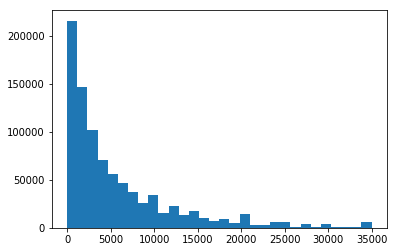

In [214]:
plt.hist(raw_data['total_rec_prncp'], bins=30)
plt.show()

In [215]:
raw_data['total_rec_prncp']  = np.log1p(raw_data['total_rec_prncp'])

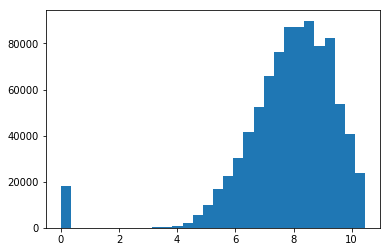

In [216]:
plt.hist(raw_data['total_rec_prncp'], bins=30)
plt.show()

We can see that total_rec_prncp, total_pymnt_inv and total_pymnt have nearly identical distributions. Thus, let's drop total_rec_prnc and total_pymnt_inv.

In [217]:
raw_data.drop(columns=['total_rec_prncp', 'total_pymnt_inv'], axis=1, inplace=True)

#### total_rec_int

In [218]:
raw_data['total_rec_int'].describe()

count    886877.000000
mean       1754.895712
std        2095.355202
min           0.000000
25%         441.530000
50%        1073.480000
75%        2238.440000
max       24205.620000
Name: total_rec_int, dtype: float64

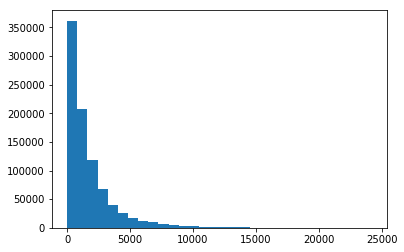

In [219]:
plt.hist(raw_data['total_rec_int'], bins=30)
plt.show()

In [220]:
raw_data['total_rec_int'] = np.log1p(raw_data['total_rec_int'])

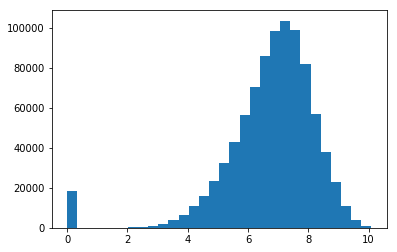

In [221]:
plt.hist(raw_data['total_rec_int'], bins=30)
plt.show()

This distribution is again very similar, but slightly different. Let's leave it for now.

#### total_rec_late_fee

In [222]:
raw_data['total_rec_late_fee'].describe()

count    886877.000000
mean          0.396032
std           4.084798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

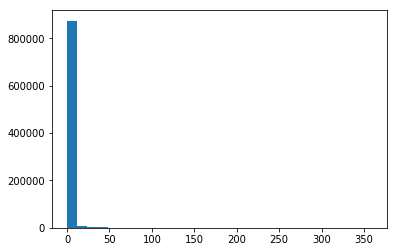

In [223]:
plt.hist(raw_data['total_rec_late_fee'], bins=30)
plt.show()

In [224]:
raw_data['total_rec_late_fee'] = np.log1p(raw_data['total_rec_late_fee'])

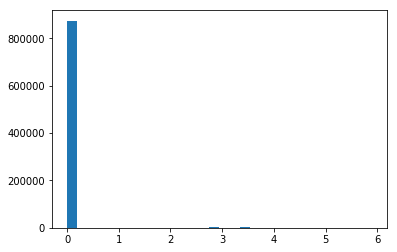

In [225]:

plt.hist(raw_data['total_rec_late_fee'], bins=30)
plt.show()

In [226]:
(raw_data['total_rec_late_fee'] == 0).sum()

874394

This variable is almost constant, let's remove it.

In [227]:
raw_data.drop(columns=['total_rec_late_fee'], axis=1, inplace=True)

#### recoveries

In [228]:
raw_data['recoveries'].describe()

count    886877.000000
mean         45.904791
std         409.668626
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [229]:
(raw_data['recoveries'] == 0).sum()

862238

Again, almost constant, let's remove it.

In [230]:
raw_data.drop(columns=['recoveries'], axis=1, inplace=True)

#### collection_recovery_fee

In [231]:
raw_data['collection_recovery_fee'].describe()

count    886877.000000
mean          4.876863
std          63.098215
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64

In [232]:
(raw_data['collection_recovery_fee'] == 0).sum()

863408

As before.

In [233]:
raw_data.drop(columns=['collection_recovery_fee'], axis=1, inplace=True)

#### last_pymnt_d

In [234]:
raw_data['last_pymnt_d'].describe()

count       869232
unique          98
top       Jan-2016
freq        469961
Name: last_pymnt_d, dtype: object

In [235]:
raw_data['last_pymnt_d'].isnull().sum()/raw_data.shape[0]*100

1.9895656331148512

In [236]:
raw_data.drop(columns=['last_pymnt_d'], axis=1, inplace=True)

#### last_pymnt_amnt

In [237]:
raw_data['last_pymnt_amnt'].describe()

count    886877.000000
mean       2164.126233
std        4794.476650
min           0.000000
25%         280.170000
50%         462.800000
75%         831.130000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64

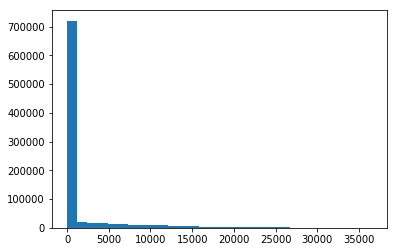

In [238]:
plt.hist(raw_data['last_pymnt_amnt'], bins=30)
plt.show()

In [239]:
raw_data['last_pymnt_amnt'] = np.log1p(raw_data['last_pymnt_amnt'])

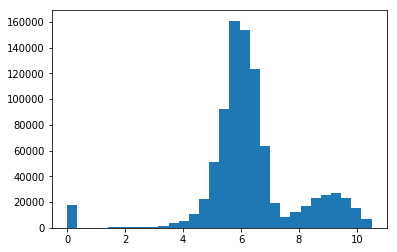

In [240]:
plt.hist(raw_data['last_pymnt_amnt'], bins=30)
plt.show()

#### next_pymnt_d

In [241]:
(raw_data['next_pymnt_d'].isnull().sum())/raw_data.shape[0]

0.2850135926402421

In [242]:
raw_data.drop(columns=['next_pymnt_d'], axis=1, inplace=True)

#### last_credit_pull_d

In [243]:
raw_data['last_credit_pull_d'].describe()

count       886825
unique         103
top       Jan-2016
freq        730265
Name: last_credit_pull_d, dtype: object

In [244]:
raw_data['last_credit_pull_d'].isnull().sum()

52

In [245]:
raw_data.drop(columns=['last_credit_pull_d'], axis=1, inplace=True)

#### collections_12_mths_ex_med

In [246]:
raw_data['collections_12_mths_ex_med'].isnull().sum()

113

In [247]:
raw_data['collections_12_mths_ex_med'].describe()

count    886764.000000
mean          0.014384
std           0.134214
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

In [248]:
(raw_data['collections_12_mths_ex_med'] == 0).sum()

875086

Constant variable = remove it.

In [249]:
raw_data.drop(columns=['collections_12_mths_ex_med'], axis=1, inplace=True)

#### policy_code

In [250]:
raw_data['policy_code'].isnull().sum()

0

In [251]:
raw_data['policy_code'].describe()

count    886877.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: policy_code, dtype: float64

In [252]:
(raw_data['policy_code'] == 1).sum()

886877

In [253]:
raw_data.drop(columns=['policy_code'], axis=1, inplace=True)

#### application_type

In [254]:
raw_data['application_type'].isnull().sum()

0

In [255]:
raw_data['application_type'].describe()

count         886877
unique             2
top       INDIVIDUAL
freq          886366
Name: application_type, dtype: object

In [256]:
raw_data.drop(columns=['application_type'], axis=1, inplace=True)

#### initial_list_status

In [257]:
raw_data['initial_list_status'].isnull().sum()

0

In [258]:
raw_data['initial_list_status'].describe()

count     886877
unique         2
top            f
freq      456529
Name: initial_list_status, dtype: object

In [259]:
raw_data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

Binarize it.

In [260]:
raw_data['initial_list_status'] = raw_data['initial_list_status'].apply(lambda x: 0 if x == 'f' else 1)

#### acc_now_delinq

In [261]:
raw_data['acc_now_delinq'].isnull().sum()

0

In [262]:
raw_data['acc_now_delinq'].describe()

count    886877.000000
mean          0.004991
std           0.077624
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: acc_now_delinq, dtype: float64

In [263]:
(raw_data['acc_now_delinq'] == 0).sum()

882766

In [264]:
raw_data.drop(columns=['acc_now_delinq'], axis=1, inplace=True)

Let's summarize our variables so far.

In [265]:
len(raw_data.columns)

101

In [266]:
raw_data.shape[1]

101

Finally, let's deal with the target variable.

In [267]:
raw_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [268]:
def loan_status_binarizer(loan_status):
    bad_statuses = ['Default', 'Charged off', 'Does not meet the credit policy. Status: Charged Off', 'Late (31-120 days)']
    if loan_status in bad_statuses:
        return 1
    else:
        return 0

In [269]:
raw_data['loan_status'] = raw_data['loan_status'].apply(loan_status_binarizer)

In [270]:
y = np.array(raw_data['loan_status'])

In [271]:
raw_data.drop(columns=['loan_status'], axis=1, inplace=True)

In [272]:
X = np.array(raw_data)

#### BASIC STATS OF Y

In [273]:
y.mean()*100

1.443266653662233

In [274]:
y.std()

0.1192659409607998

# CORRELATIONS

In [275]:
import seaborn as sns

In [276]:
correlations = raw_data.corr()

In [277]:
((correlations != 1) & (correlations != -1)) & ((correlations > 0.7) | (correlations < -0.7))

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,earliest_cr_line_year_2000,earliest_cr_line_year_2001,earliest_cr_line_year_2002,earliest_cr_line_year_2003,earliest_cr_line_year_2004,earliest_cr_line_year_2005,earliest_cr_line_year_2006,earliest_cr_line_year_2007,earliest_cr_line_year_2008,earliest_cr_line_year_Other
loan_amnt,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
term,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
int_rate,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
installment,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sub_grade,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
emp_length,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dti,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
delinq_2yrs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
inq_last_6mths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


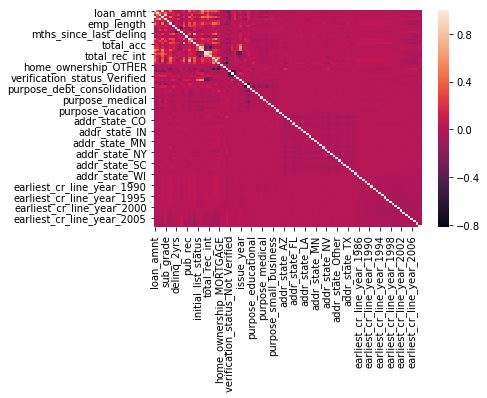

In [278]:
sns.heatmap(correlations)
plt.show()

Although there are correlations between the variables, we will first fit baseline model including correlated variables and if the peformance is not satisfactory, then we will use PCA for dimensionality reduction, which also decorellates variables.

# TRAIN-VAL-TEST SPLIT

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)

In [281]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [282]:
print(f'X_train shape:{X_train.shape}')
print(f'X_val shape:{X_val.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(594207, 100)
X_val shape:(146335, 100)
X_test shape:(146335, 100)


In [283]:
print(f'y_train shape:{y_train.shape}')
print(f'y_val shape:{y_val.shape}')
print(f'y_test shape:{y_test.shape}')

y_train shape:(594207,)
y_val shape:(146335,)
y_test shape:(146335,)


# FIT ML MODELS

Let's prepare functions for graphing relevant metrics. Since the classes are highly imbalanced, we will use not only ROC AUC, but also average precision, which is a better metric for binary classification in terms of highly imbalanced datasets.

In [284]:
from sklearn import metrics

In [285]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred[:,1])
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1])
    plt.title(f'AUC: {metrics.roc_auc_score(y_true, y_pred[:,1])}')
    plt.show()

In [286]:
def plot_precision_recall_curve(y_true, y_pred):
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_pred[:,1])
    plt.plot(recall, precision)
    plt.title(f'AUC: {metrics.average_precision_score(y_true, y_pred[:,1])}')
    plt.show()

#### LOGISTIC REGRESSION

In [287]:
from sklearn.linear_model import LogisticRegression

In [288]:
# baseline
logit = LogisticRegression()
logit.fit(X_train, y_train)

/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [289]:
y_score = logit.predict_proba(X_val)

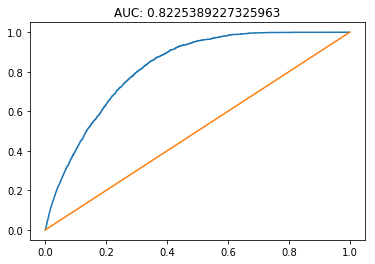

In [290]:
plot_roc_curve(y_val, y_score)

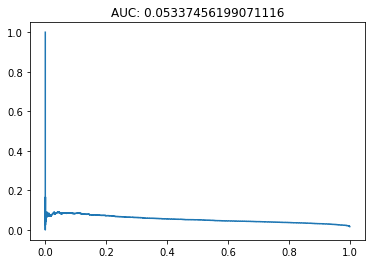

In [291]:
plot_precision_recall_curve(y_val, y_score)

## Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [294]:
y_score = forest.predict_proba(X_val)

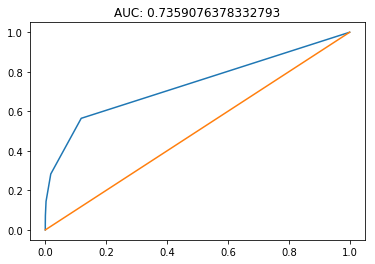

In [295]:
plot_roc_curve(y_val, y_score)

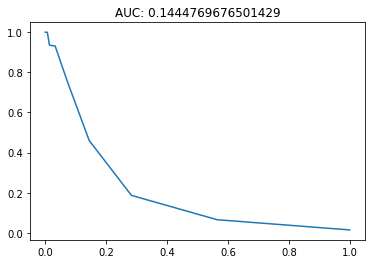

In [296]:
plot_precision_recall_curve(y_val, y_score)

## XGBOOST

In [297]:
from xgboost.sklearn import XGBClassifier

In [298]:
xgb = XGBClassifier().fit(X_train, y_train)

In [299]:
y_score = xgb.predict_proba(X_val)

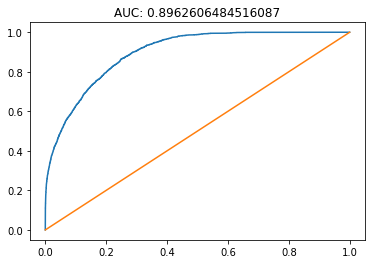

In [300]:
plot_roc_curve(y_val, y_score)

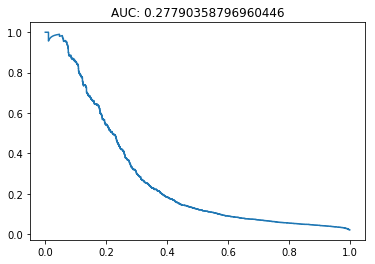

In [301]:
plot_precision_recall_curve(y_val, y_score)

So far, plain xgboost is by far the best algorithm, both in terms of ROC AUC and, more importantly, average precision. Since there are only about 1.5% of 1s in the dataset, baseline for average precision is 1.5%. Thus average precision of 27% is a very good result for an untuned xgboost!

We also tried runing SVM with linear kernel, but the computations took way too long.

## DIMENSIONALITY REDUCTION

We will check adding PCA as a step prior to fitting ML models in order to remove correlations from variables and focuse only on most important variables. Let's see if this improves the results. We will use PCA with 99% of variance retained.

In [302]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [303]:
logit_pca = Pipeline([
    ('pca', PCA(0.99)),
    ('logit', LogisticRegression())])

In [304]:
logit_pca.fit(X_train, y_train)

/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [305]:
y_score = logit_pca.predict_proba(X_val)

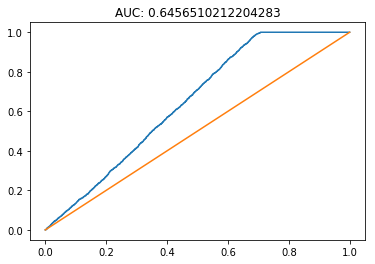

In [306]:
plot_roc_curve(y_val, y_score)

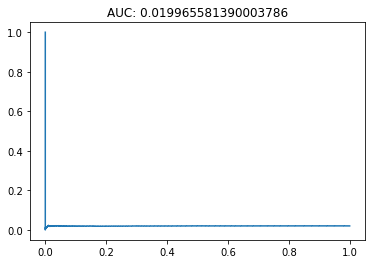

In [307]:
plot_precision_recall_curve(y_val, y_score)

In [308]:
xgboost_pca = Pipeline([
    ('pca', PCA(0.99)),
    ('xgboost', XGBClassifier())])

In [309]:
xgboost_pca.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgboost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       ma...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [310]:
y_score = xgboost_pca.predict_proba(X_val)

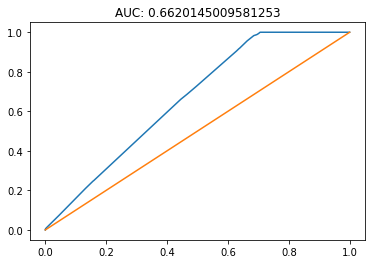

In [311]:
plot_roc_curve(y_val, y_score)

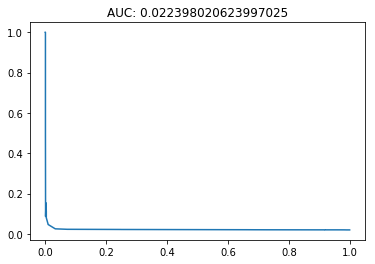

In [312]:
plot_precision_recall_curve(y_val, y_score)

We see that PCA not only did not help, but actually worsened the results.

Finally, we will run a small grid search to attempt to tune the params of the logit model (without PCA). Tuning the hyperparams of the xgboost is too time consuming for our current resources.

In [313]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [314]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score
import scipy

We perform 3-fold cross validation.

In [315]:
logit_grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring = 'average_precision', n_jobs=-1)

In [316]:
logit_grid_search.fit(X_train, y_train)

/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='average_precision', verbose=0)

In [317]:
logit_grid_search.best_params_

{'C': 0.1}

In [318]:
logit_grid_search.best_score_

0.054119447873338035

In [319]:
logit_with_regularization = LogisticRegression(C=0.1)

In [320]:
logit_with_regularization.fit(X_train, y_train)

/Users/testuser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [321]:
y_score = logit_with_regularization.predict_proba(X_val)

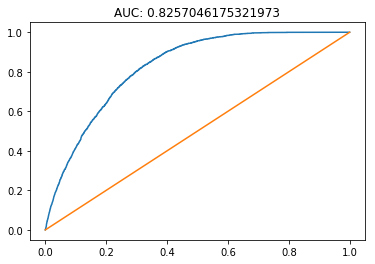

In [322]:
plot_roc_curve(y_val, y_score)

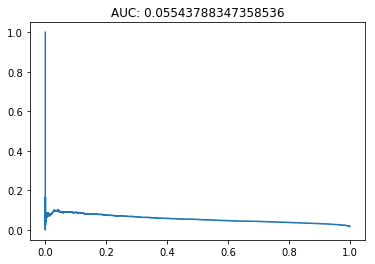

In [323]:
plot_precision_recall_curve(y_val, y_score)

# CONCLUSION

By far the best model was xgboost, both in terms of ROC AUC and average precision. Given more computing resources, it's performance could be further tuned by hypeparameter search (either grid or randomized search). 

To estimate final performance of the model, we will retrain it on both training and validatoin sets combined and report the final score on the test set. 

In [324]:
X = np.concatenate([X_train, X_val])

In [325]:
y = np.concatenate([y_train, y_val])

In [326]:
final_model = XGBClassifier()

In [327]:
final_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [328]:
y_score = final_model.predict_proba(X_test)

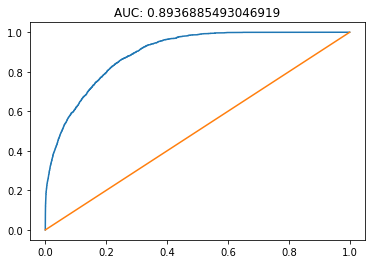

In [329]:
plot_roc_curve(y_test, y_score)

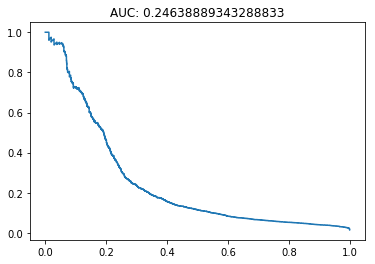

In [330]:
plot_precision_recall_curve(y_test, y_score)

Thus, final average precision on test set is 0.24, and final ROC AUC is 0.893